In [1]:
import pandas as pd

In [3]:
import pandas as pd

files = [
    "dataset_PSI.csv",
    "dataset_FS.csv",
    "dataset_TS.csv",
    "dataset_EPS1.csv",
    "dataset_CE.csv",
    "dataset_CP.csv",
    "dataset_SE.csv"
]

for f in files:
    df = pd.read_csv(f, index_col=0)
    print(f, "->", df.shape)


dataset_PSI.csv -> (2205, 15)
dataset_FS.csv -> (2205, 6)
dataset_TS.csv -> (2205, 12)
dataset_EPS1.csv -> (2205, 3)
dataset_CE.csv -> (2205, 2)
dataset_CP.csv -> (2205, 2)
dataset_SE.csv -> (2205, 2)


In [4]:
import pandas as pd

# ===============================
# 1. Charger tous les datasets FEATURES
# ===============================
dataset_psi = pd.read_csv("dataset_PSI.csv", index_col=0)
df_fs       = pd.read_csv("dataset_FS.csv", index_col=0)
TS_dataset  = pd.read_csv("dataset_TS.csv", index_col=0)
eps1_final  = pd.read_csv("dataset_EPS1.csv", index_col=0)
df_ce       = pd.read_csv("dataset_CE.csv", index_col=0)
df_cp       = pd.read_csv("dataset_CP.csv", index_col=0)
df_se       = pd.read_csv("dataset_SE.csv", index_col=0)

# ===============================
# 2. Merge FINAL des FEATURES (X)
# ===============================
X = pd.concat([
    dataset_psi,
    df_fs,
    TS_dataset,
    eps1_final,
    df_ce,
    df_cp,
    df_se
], axis=1)

X.index.name = "cycle"

print("="*60)
print("DATASET FEATURES (X)")
print("="*60)
print("Shape :", X.shape)
print(X.head())


DATASET FEATURES (X)
Shape : (2205, 42)
        VS1_std  VS1_max    PS1_std  PS1_max  PS1_median    PS2_std  PS2_max  \
cycle                                                                          
0      0.027078    0.624  13.939309   191.51      156.25  47.114508   156.99   
1      0.027241    0.626  14.118967   191.47      156.06  47.045611   157.56   
2      0.036729    0.662  14.192619   191.41      155.72  46.992060   156.97   
3      0.033464    0.645  14.227803   191.34      155.56  46.972221   156.44   
4      0.033484    0.660  14.276434   191.41      155.34  46.874946   158.13   

       PS2_median   PS3_std  PS3_max  ...   TS4_std  EPS1_median    EPS1_std  \
cycle                                 ...                                      
0         129.365  0.945705   10.039  ...  1.116478       2479.8  185.616121   
1         129.385  0.941967    9.992  ...  0.435312       2470.0  189.940089   
2         129.325  0.943501   10.914  ...  0.293889       2457.4  190.736850   

In [6]:
profile = pd.read_csv("profile.txt", sep="\t", header=None)

print("="*60)
print("PROFILE.TXT")
print("="*60)
print("Shape :", profile.shape)
print(profile.head())


PROFILE.TXT
Shape : (2205, 5)
   0    1  2    3  4
0  3  100  0  130  1
1  3  100  0  130  1
2  3  100  0  130  1
3  3  100  0  130  1
4  3  100  0  130  1


In [7]:
# Cible = état de la valve
y = (profile[1] == 100).astype(int)
y.name = "valve_optimal"

print(y.value_counts())

valve_optimal
1    1125
0    1080
Name: count, dtype: int64


In [12]:
dataset_final = X.join(y)
dataset_final.index.name = "cycle"
dataset_final.to_csv("dataset_final.csv")
print("="*60)
print("DATASET FINAL (FEATURES + TARGET)")
print("="*60)
print("Shape :", dataset_final.shape)
print(dataset_final.head())

DATASET FINAL (FEATURES + TARGET)
Shape : (2205, 43)
        VS1_std  VS1_max    PS1_std  PS1_max  PS1_median    PS2_std  PS2_max  \
cycle                                                                          
0      0.027078    0.624  13.939309   191.51      156.25  47.114508   156.99   
1      0.027241    0.626  14.118967   191.47      156.06  47.045611   157.56   
2      0.036729    0.662  14.192619   191.41      155.72  46.992060   156.97   
3      0.033464    0.645  14.227803   191.34      155.56  46.972221   156.44   
4      0.033484    0.660  14.276434   191.41      155.34  46.874946   158.13   

       PS2_median   PS3_std  PS3_max  ...  EPS1_median    EPS1_std  EPS1_max  \
cycle                                 ...                                      
0         129.365  0.945705   10.039  ...       2479.8  185.616121    2951.6   
1         129.385  0.941967    9.992  ...       2470.0  189.940089    2947.4   
2         129.325  0.943501   10.914  ...       2457.4  190.736850

In [14]:
dataset_final.columns

Index(['VS1_std', 'VS1_max', 'PS1_std', 'PS1_max', 'PS1_median', 'PS2_std',
       'PS2_max', 'PS2_median', 'PS3_std', 'PS3_max', 'PS3_median', 'PS5_mean',
       'PS5_max', 'PS6_mean', 'PS6_max', 'FS1_median', 'FS1_std', 'FS1_max',
       'FS2_median', 'FS2_std', 'FS2_max', 'TS1_mean', 'TS1_max', 'TS1_std',
       'TS2_mean', 'TS2_max', 'TS2_std', 'TS3_mean', 'TS3_max', 'TS3_std',
       'TS4_mean', 'TS4_max', 'TS4_std', 'EPS1_median', 'EPS1_std', 'EPS1_max',
       'CE_value', 'CE_diff', 'CP', 'CP_delta', 'SE', 'SE_delta',
       'valve_optimal'],
      dtype='object')

In [35]:
import pandas as pd

dataset = pd.read_csv("dataset_final.csv", index_col=0)

# Séparation features / cible
X = dataset.drop(columns=["valve_optimal"])
y = dataset["valve_optimal"]

# ==========================
# SPLIT SELON L'ÉNONCÉ
# ==========================
X_train = X.iloc[:2000]
y_train = y.iloc[:2000]

X_test = X.iloc[2000:]
y_test = y.iloc[2000:]

# Vérifications
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

print("\nRépartition des classes (train) :")
print(y_train.value_counts())

print("\nRépartition des classes (test) :")
print(y_test.value_counts())

X_train : (2000, 42)
y_train : (2000,)
X_test  : (205, 42)
y_test  : (205,)

Répartition des classes (train) :
valve_optimal
1    1052
0     948
Name: count, dtype: int64

Répartition des classes (test) :
valve_optimal
0    132
1     73
Name: count, dtype: int64


In [36]:
X_train.isna().sum().sort_values(ascending=False).head(10)

SE_delta    1
TS4_max     0
TS1_std     0
TS2_mean    0
TS2_max     0
TS2_std     0
TS3_mean    0
TS3_max     0
TS3_std     0
TS4_mean    0
dtype: int64

In [38]:
# Correction des NaN
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialisation
scaler = StandardScaler()

# Fit uniquement sur le train
X_train_scaled = scaler.fit_transform(X_train)

# Transform sur train et test
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled :", X_train_scaled.shape)
print("X_test_scaled  :", X_test_scaled.shape)

X_train_scaled : (2000, 42)
X_test_scaled  : (205, 42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialisation du modèle
log_reg = LogisticRegression(max_iter=1000)

# Entraînement
log_reg.fit(X_train_scaled, y_train)

# Prédictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Scores
print("Accuracy TRAIN :", accuracy_score(y_train, y_train_pred))
print("Accuracy TEST  :", accuracy_score(y_test, y_test_pred))

print("\nClassification report (TEST) :")
print(classification_report(y_test, y_test_pred))

Accuracy TRAIN : 0.9305
Accuracy TEST  : 0.8195121951219512

Classification report (TEST) :
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       132
           1       0.66      1.00      0.80        73

    accuracy                           0.82       205
   macro avg       0.83      0.86      0.82       205
weighted avg       0.88      0.82      0.82       205



In [40]:
import pandas as pd

# Création d’un DataFrame d’analyse
errors = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_test_pred
}, index=y_test.index)

# Erreurs uniquement
errors["error"] = errors["y_true"] != errors["y_pred"]

print("Nombre total d'erreurs :", errors["error"].sum())
errors.head()

Nombre total d'erreurs : 37


,y_true,y_pred,error
cycle,,,
2000,0,0,False
2001,0,0,False
2002,0,0,False
2003,0,0,False
2004,0,0,False


In [41]:
# Faux positifs / faux négatifs
false_positives = errors[(errors.y_true == 0) & (errors.y_pred == 1)]
false_negatives = errors[(errors.y_true == 1) & (errors.y_pred == 0)]

print("Faux positifs :", len(false_positives))
print("Faux négatifs :", len(false_negatives))


Faux positifs : 37
Faux négatifs : 0


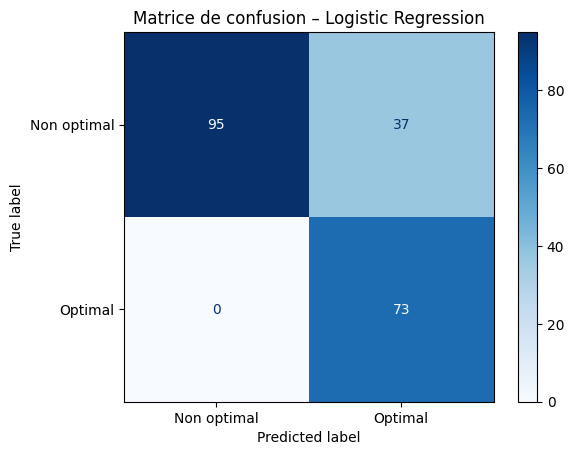

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Non optimal", "Optimal"]
)

disp.plot(cmap="Blues")
plt.title("Matrice de confusion – Logistic Regression")
plt.show()


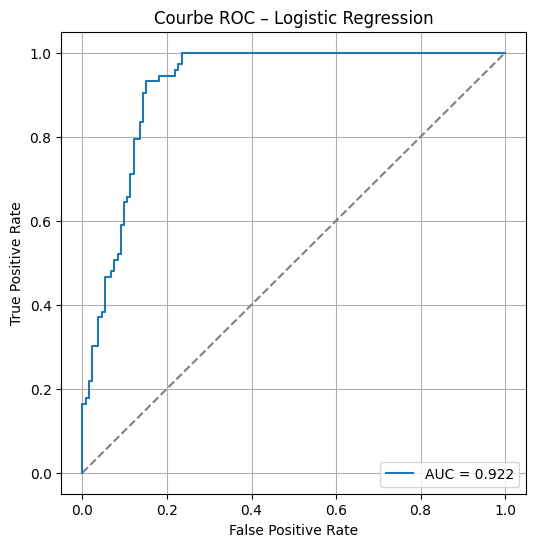

AUC : 0.9217517642175177


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilités
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print("AUC :", auc_score)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "class_weight": [None, "balanced"]
}

log_reg = LogisticRegression(
    max_iter=2000,
    solver="liblinear"
)

grid = GridSearchCV(
    log_reg,
    param_grid,
    scoring="f1",
    cv=5
)

grid.fit(X_train_scaled, y_train)

print("Meilleurs paramètres :", grid.best_params_)
best_model = grid.best_estimator_


Meilleurs paramètres : {'C': 10, 'class_weight': None, 'penalty': 'l2'}


In [45]:
import joblib
best_log_reg = LogisticRegression(
    C=10,
    penalty="l2",
    class_weight=None,
    max_iter=2000,
    solver="liblinear"
)

best_log_reg.fit(X_train_scaled, y_train)
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")



['feature_names.pkl']

In [ ]:
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred  = best_log_reg.predict(X_test_scaled)
print("Accuracy TRAIN :", accuracy_score(y_train, y_train_pred))
print("Accuracy TEST  :", accuracy_score(y_test, y_test_pred))

print("\nClassification report (TEST) :")
print(classification_report(y_test, y_test_pred))


Accuracy TRAIN : 0.9595
Accuracy TEST  : 0.8195121951219512

Classification report (TEST) :
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       132
           1       0.67      0.99      0.80        73

    accuracy                           0.82       205
   macro avg       0.83      0.86      0.82       205
weighted avg       0.87      0.82      0.82       205



: 

In [29]:
import joblib

joblib.dump(log_reg, "model_logreg.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "features.pkl")

['features.pkl']